In [ ]:
# Data Collecting
import pandas as pd
import numpy as np

#Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Feature Engineering
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

# Split
from sklearn.model_selection import train_test_split

# Model
from sklearn.ensemble import RandomForestRegressor

# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# Evaluation
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error, r2_score

# **Data collecting**

In [ ]:
import pandas as pd
import numpy as np
train = pd.read_csv('https://drive.usercontent.google.com/download?id=1WFZxBcNrJbZk-PWEtMjTlvKW8cNUq6aV&export=download&authuser=0&confirm=t&uuid=985c101d-d1d7-4730-832b-db1fa231ef10&at=AKSUxGNIvti1b213Rky8EjmAVxXK:1760967736846')
test = pd.read_csv('https://drive.usercontent.google.com/download?id=1ao_cQ57kY4Cs3tx-hdpcLOj4Uuomi4Y_&export=download&authuser=0&confirm=t&uuid=f161e350-a2c6-4e85-b2d7-30ff77e4d5c6&at=AKSUxGNgzAwSRJL4R4jFwDALAxV0:1760968344384')

# **EDA (Exploratory Data Analysis)**

In [ ]:
# melihat seluruh kolom dari data train dan test
print(train.columns)
print(test.columns)

Index(['ID', 'Tahun', 'Nama_Negara', 'Wilayah', 'Jenis_Tanaman',
       'Total_Curah_Hujan_mm', 'Emisi_CO2_JT_Ton', 'Hasil_Panen_Ton_per_HA',
       'Kejadian_Cuaca_Ekstrim', 'Akses_Irigasi',
       'Penggunaan_Pestisida_KG_per_HA', 'Penggunaan_Pupuk_KG_per_HA',
       'Indeks_Kesehatan_Tanah', 'Strategi_Adaptasi', 'Suhu_Rata_Rata_C'],
      dtype='object')
Index(['ID', 'Tahun', 'Nama_Negara', 'Wilayah', 'Jenis_Tanaman',
       'Total_Curah_Hujan_mm', 'Emisi_CO2_JT_Ton', 'Hasil_Panen_Ton_per_HA',
       'Kejadian_Cuaca_Ekstrim', 'Akses_Irigasi',
       'Penggunaan_Pestisida_KG_per_HA', 'Penggunaan_Pupuk_KG_per_HA',
       'Indeks_Kesehatan_Tanah', 'Strategi_Adaptasi'],
      dtype='object')


In [ ]:
# Hapus kolom yang tidak diperlukan
train = train.drop(columns=train.columns[0])
test = test.drop(columns=test.columns[0])

In [ ]:
train.info()
train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Tahun                           8000 non-null   int64  
 1   Nama_Negara                     8000 non-null   object 
 2   Wilayah                         8000 non-null   object 
 3   Jenis_Tanaman                   7781 non-null   object 
 4   Total_Curah_Hujan_mm            7821 non-null   float64
 5   Emisi_CO2_JT_Ton                8000 non-null   float64
 6   Hasil_Panen_Ton_per_HA          7800 non-null   float64
 7   Kejadian_Cuaca_Ekstrim          8000 non-null   int64  
 8   Akses_Irigasi                   7819 non-null   float64
 9   Penggunaan_Pestisida_KG_per_HA  8000 non-null   float64
 10  Penggunaan_Pupuk_KG_per_HA      8000 non-null   float64
 11  Indeks_Kesehatan_Tanah          8000 non-null   float64
 12  Strategi_Adaptasi               80

,Tahun,Total_Curah_Hujan_mm,Emisi_CO2_JT_Ton,Hasil_Panen_Ton_per_HA,Kejadian_Cuaca_Ekstrim,Akses_Irigasi,Penggunaan_Pestisida_KG_per_HA,Penggunaan_Pupuk_KG_per_HA,Indeks_Kesehatan_Tanah,Suhu_Rata_Rata_C
count,8000.000000,7821.000000,8000.000000,7800.000000,8000.000000,7819.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,2007.032750,1615.503060,15.271184,2.238219,4.989750,55.394575,24.920015,49.706654,64.824446,15.206680
std,10.106035,807.932322,8.551214,0.996626,3.171814,26.034847,14.454507,28.674985,20.153617,11.490611
min,1990.000000,200.170000,0.500000,0.450000,0.000000,10.010000,0.000000,0.030000,30.000000,-4.990000
25%,1998.000000,929.290000,7.860000,1.449000,2.000000,32.905000,12.550000,25.160000,47.115000,5.377500
50%,2007.000000,1614.790000,15.250000,2.170000,5.000000,55.340000,24.930000,49.270000,64.675000,15.140000
75%,2016.000000,2316.820000,22.820000,2.930000,8.000000,77.770000,37.382500,74.430000,82.302500,25.340000
max,2024.000000,2999.670000,30.000000,5.000000,10.000000,99.990000,49.990000,99.990000,100.000000,35.000000


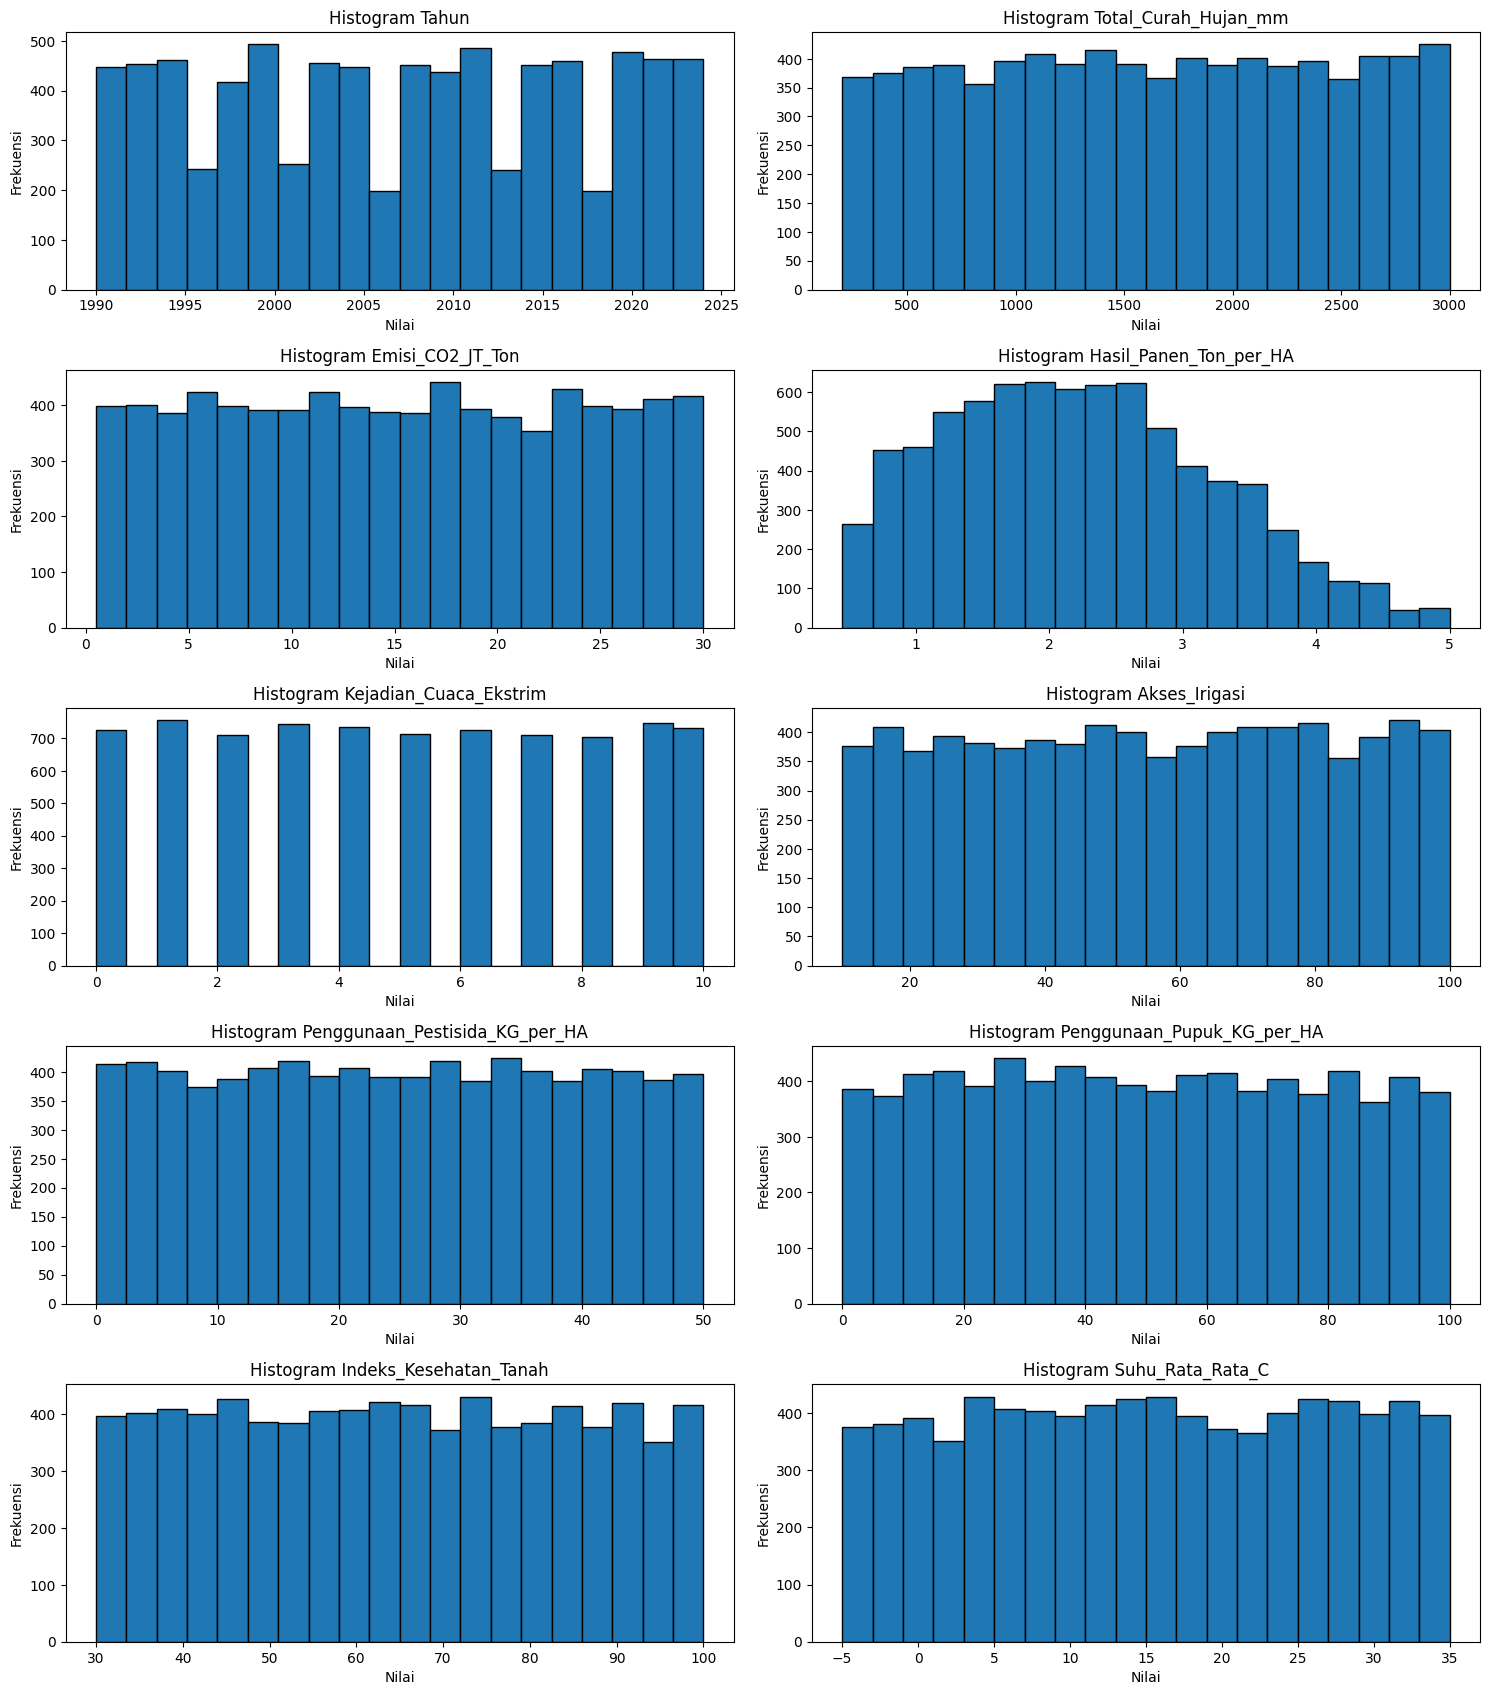

In [ ]:
# Membuat histogram untuk kolom numerik dataset train
plt.figure(figsize=(15, 20))
for i, col in enumerate(numerical_train_cols):
    plt.subplot(6, 2, i + 1)
    plt.hist(train[col], bins=20, edgecolor='black')
    plt.title('Histogram ' + col)
    plt.ylabel('Frekuensi')
    plt.xlabel('Nilai')

plt.tight_layout()
plt.show()

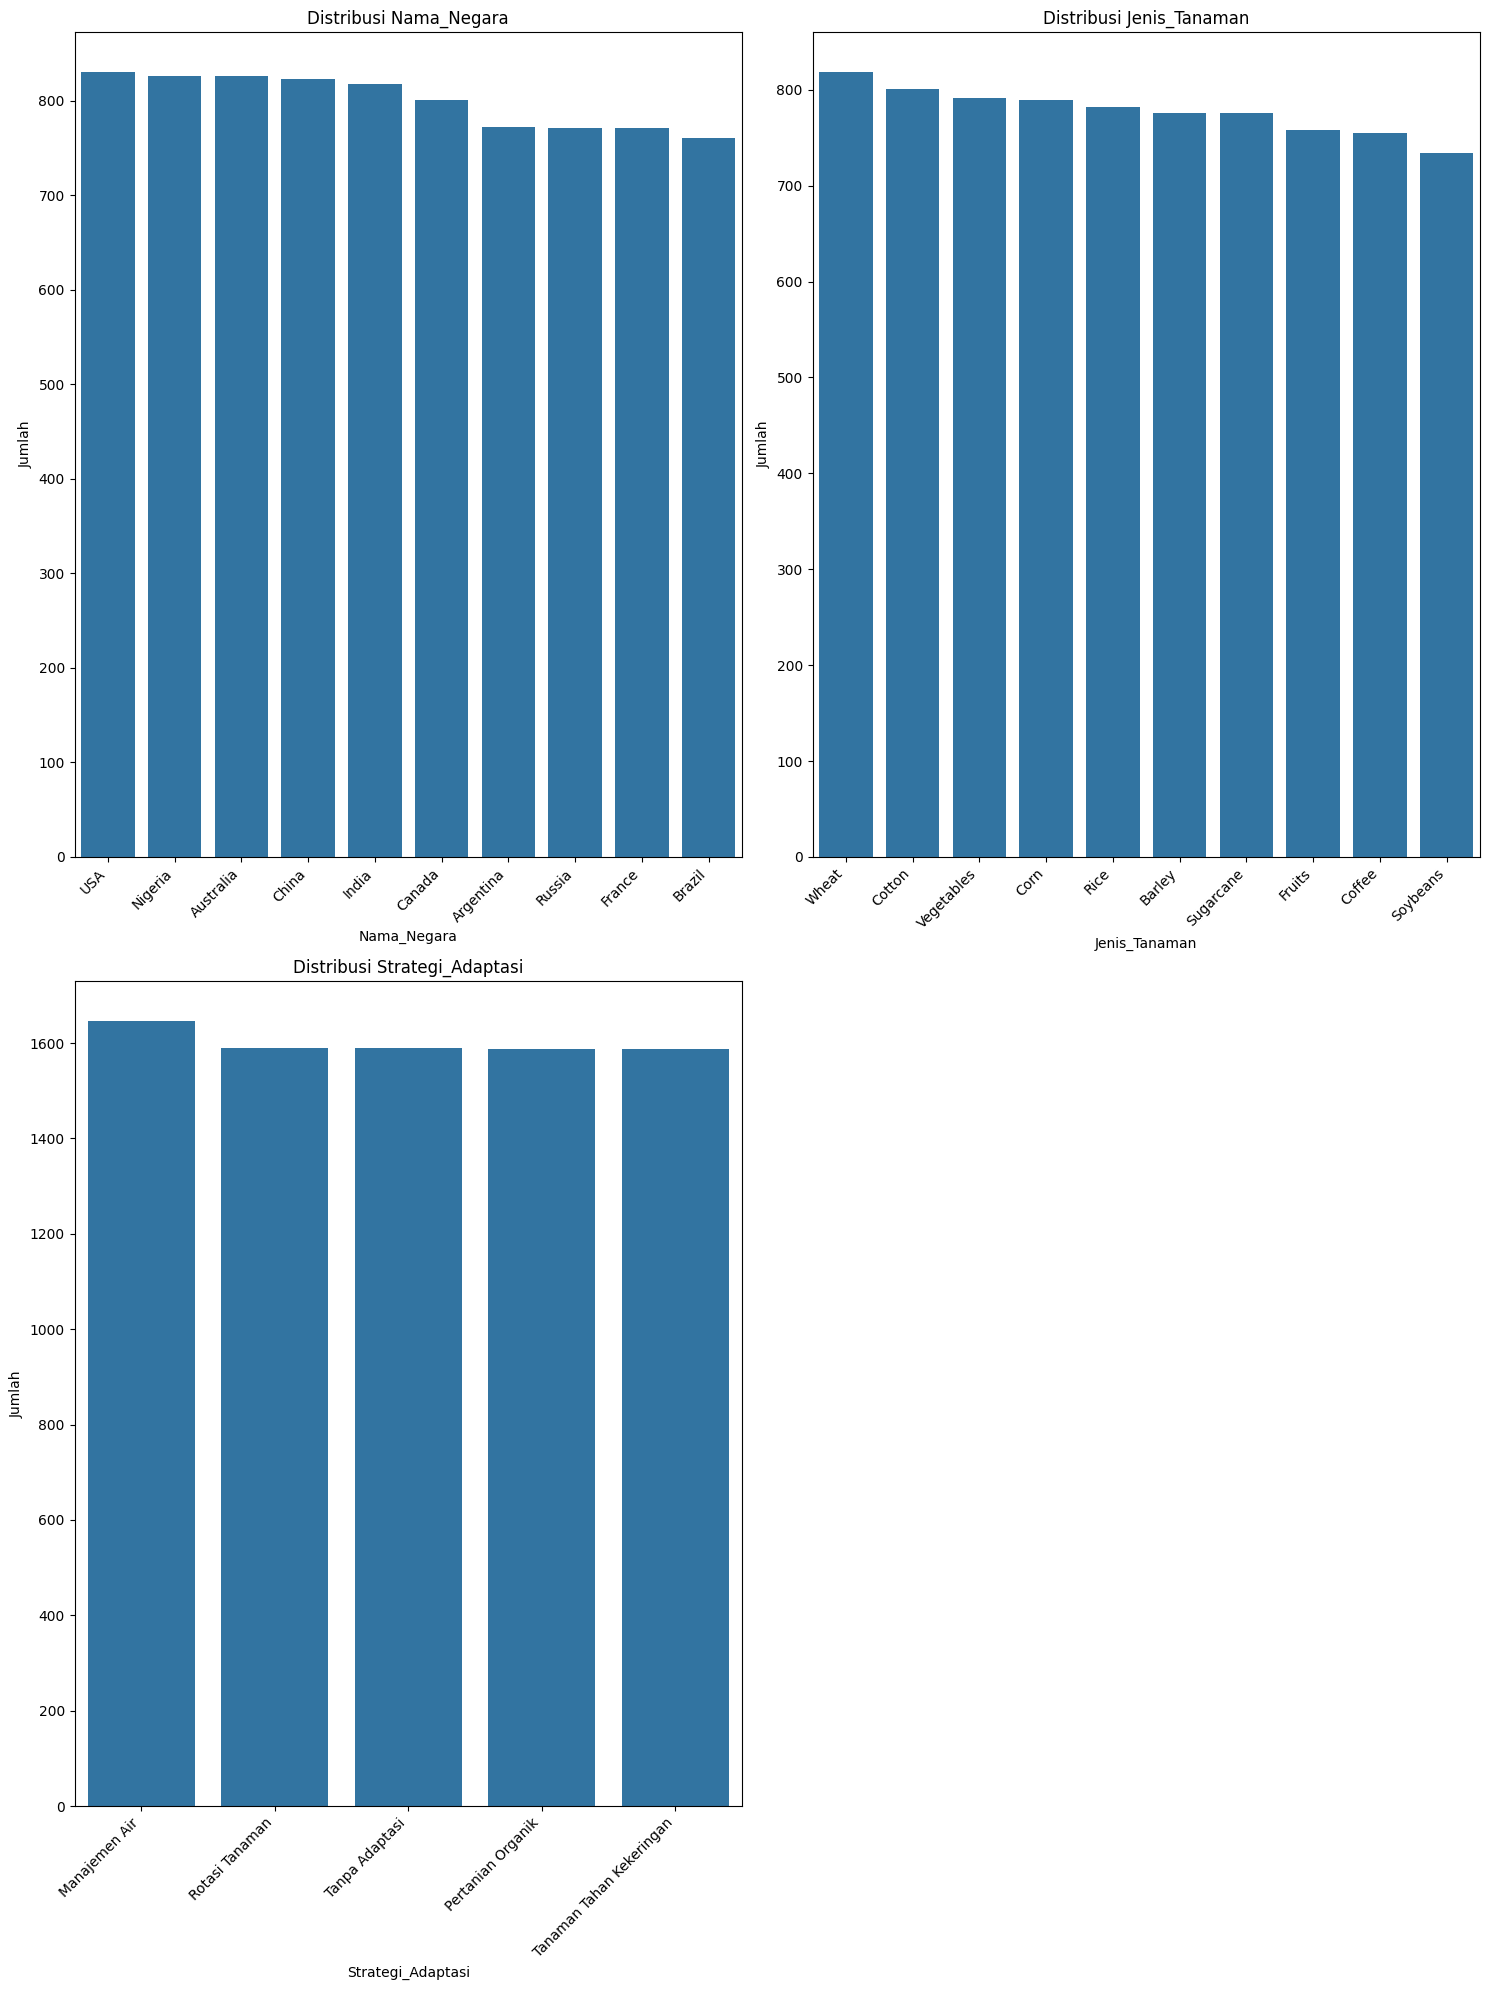

In [ ]:
# Membuat barplot untuk kolom kategorikal dataset train
categorical_cols = train.drop('Wilayah', axis=1).select_dtypes(include='object').columns.to_list()
plt.figure(figsize=(15, 20))
for i, col in enumerate(categorical_cols):
    col_counts = train[col].value_counts().reset_index()
    col_counts.columns = [col, 'count']
    plt.subplot(2, 2, i + 1)
    sns.barplot(x=col, y='count', data=col_counts)
    plt.title('Distribusi ' + col)
    plt.ylabel('Jumlah')
    plt.xlabel(col)
    # Memiringkan teks pada sumbu x
    plt.xticks(rotation=45, ha='right') # ha='right' untuk meratakan teks ke kanan

plt.tight_layout()
plt.show()

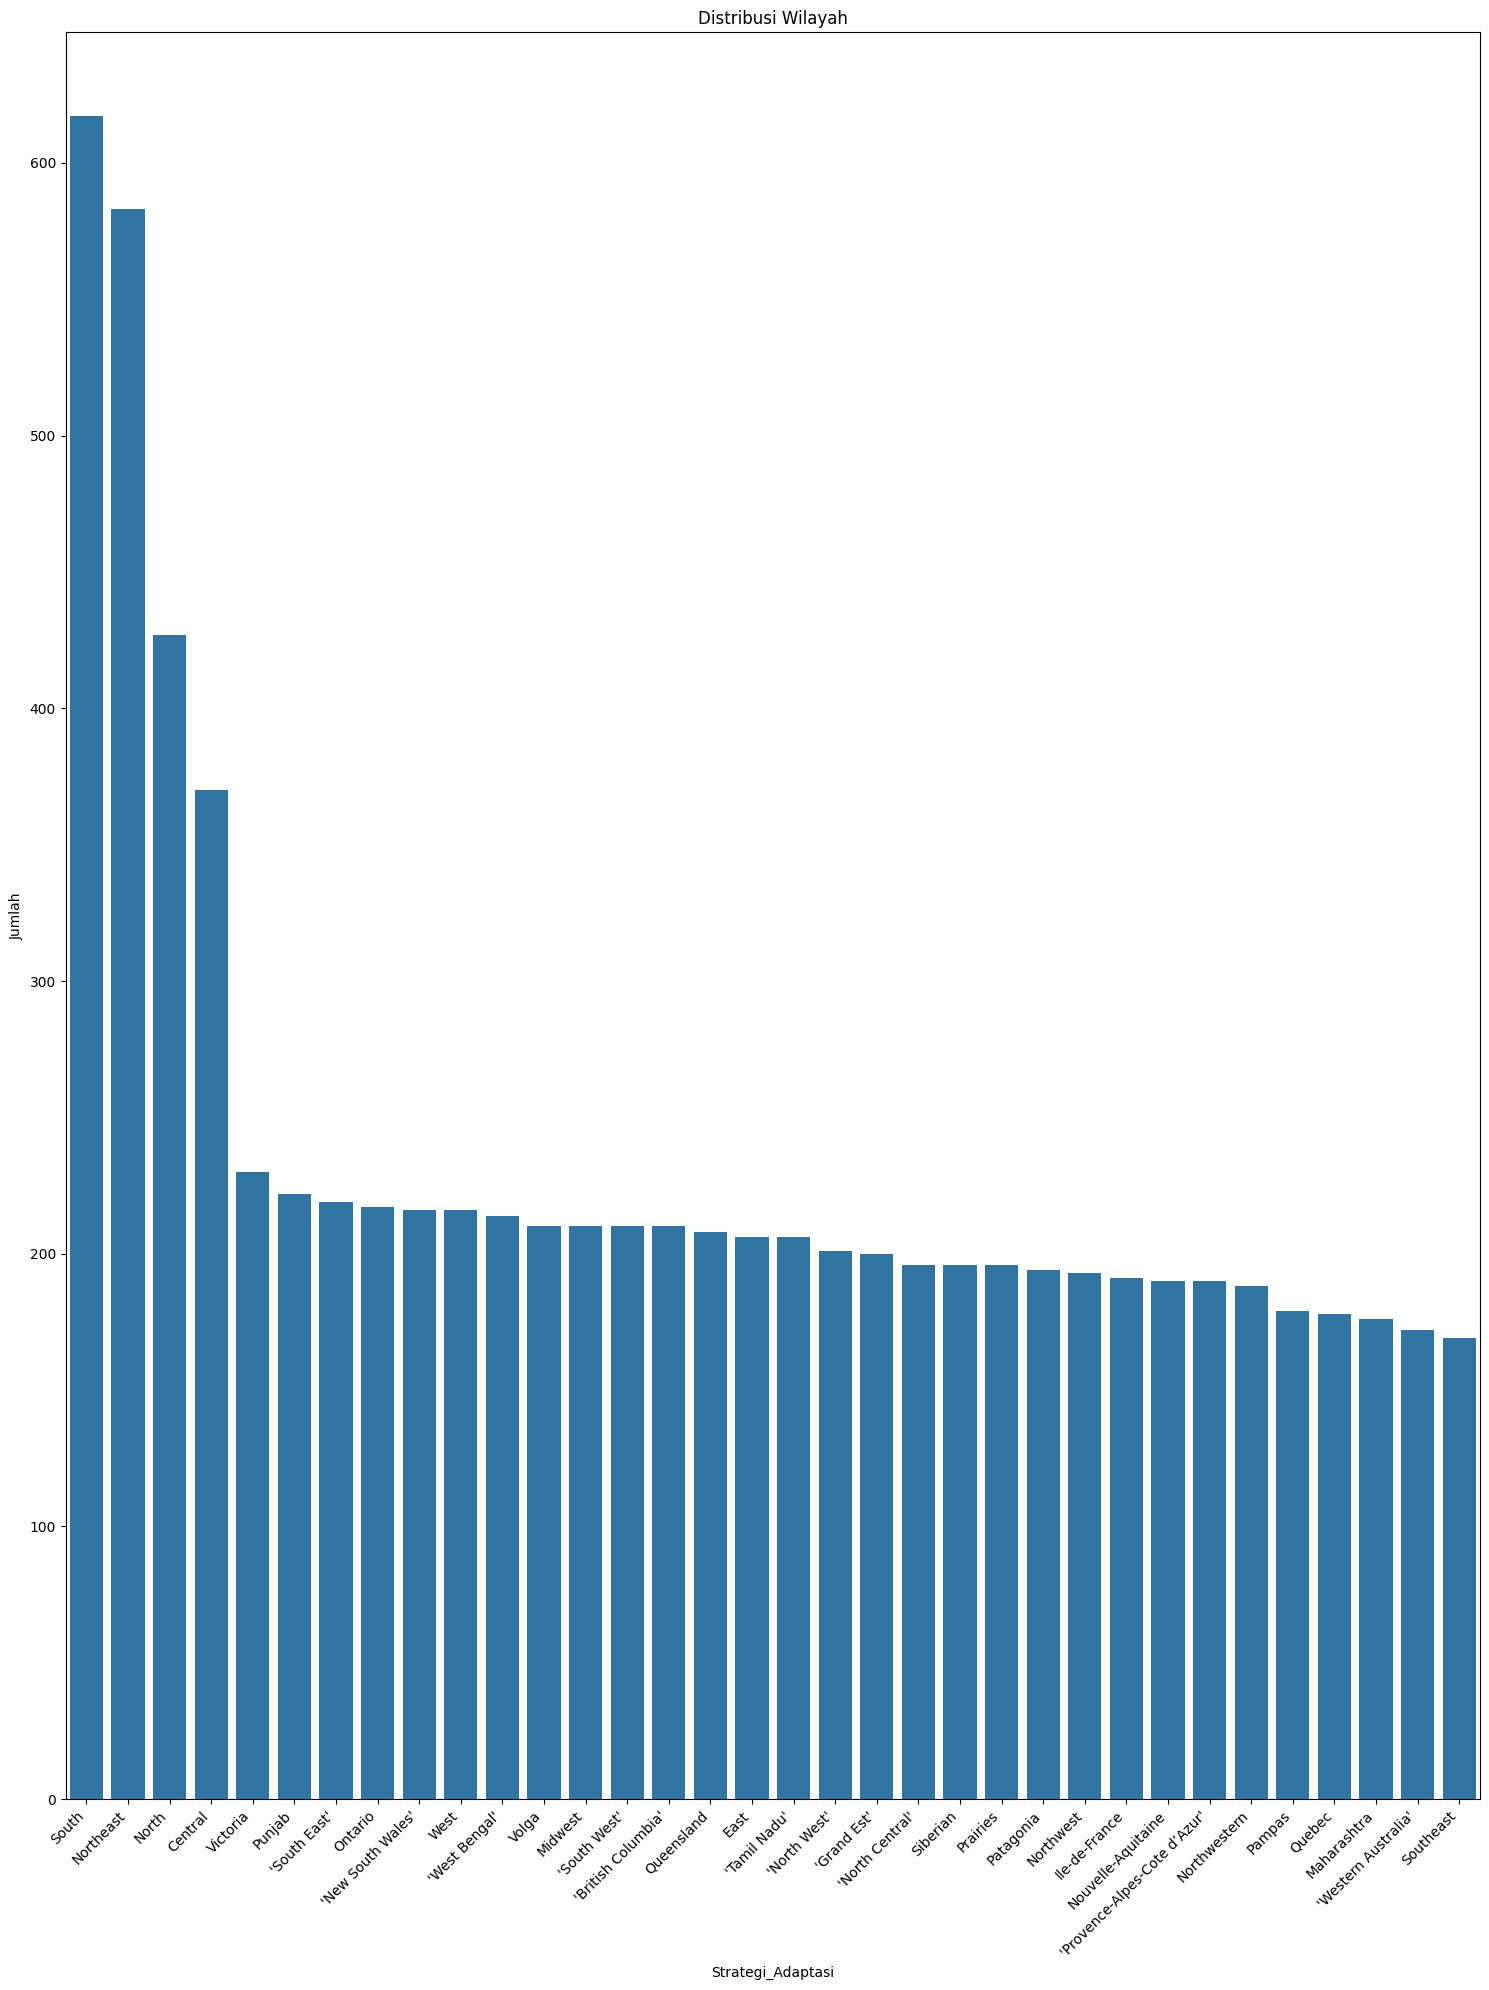

In [ ]:
# Membuat barplot untuk kolom Wilayah
plt.figure(figsize=(15, 20))

col_counts = train['Wilayah'].value_counts().reset_index()
col_counts.columns = ['Wilayah', 'count']
sns.barplot(x='Wilayah', y='count', data=col_counts)
plt.title('Distribusi Wilayah')
plt.ylabel('Jumlah')
plt.xlabel(col)
# Memiringkan teks pada sumbu x
plt.xticks(rotation=45, ha='right') # ha='right' untuk meratakan teks ke kanan

plt.tight_layout()
plt.show()

# **Data cleaning**

## Missing value

In [ ]:
# melihat missing value dari data train dan test
print("Missing values in train dataframe:")
print(train.isnull().sum())
print("\nMissing values in test dataframe:")
print(test.isnull().sum())

Missing values in train dataframe:
Tahun                               0
Nama_Negara                         0
Wilayah                             0
Jenis_Tanaman                     219
Total_Curah_Hujan_mm              179
Emisi_CO2_JT_Ton                    0
Hasil_Panen_Ton_per_HA            200
Kejadian_Cuaca_Ekstrim              0
Akses_Irigasi                     181
Penggunaan_Pestisida_KG_per_HA      0
Penggunaan_Pupuk_KG_per_HA          0
Indeks_Kesehatan_Tanah              0
Strategi_Adaptasi                   0
Suhu_Rata_Rata_C                    0
dtype: int64

Missing values in test dataframe:
Tahun                             0
Nama_Negara                       0
Wilayah                           0
Jenis_Tanaman                     0
Total_Curah_Hujan_mm              0
Emisi_CO2_JT_Ton                  0
Hasil_Panen_Ton_per_HA            0
Kejadian_Cuaca_Ekstrim            0
Akses_Irigasi                     0
Penggunaan_Pestisida_KG_per_HA    0
Penggunaan_Pupuk_KG_per_H

In [ ]:
# imputasi missing value kolom numerikal diisi dengan median
for col in ['Total_Curah_Hujan_mm', 'Hasil_Panen_Ton_per_HA', 'Akses_Irigasi']:
    train[col] = train[col].fillna(train[col].median())

# imputasi missing value kolom kategorikal diisi dengan modus
train['Jenis_Tanaman'] = train['Jenis_Tanaman'].fillna(train['Jenis_Tanaman'].mode()[0])

# tampilkan
print("Missing values in train dataframe after handling:")
print(train.isnull().sum())

Missing values in train dataframe after handling:
Tahun                             0
Nama_Negara                       0
Wilayah                           0
Jenis_Tanaman                     0
Total_Curah_Hujan_mm              0
Emisi_CO2_JT_Ton                  0
Hasil_Panen_Ton_per_HA            0
Kejadian_Cuaca_Ekstrim            0
Akses_Irigasi                     0
Penggunaan_Pestisida_KG_per_HA    0
Penggunaan_Pupuk_KG_per_HA        0
Indeks_Kesehatan_Tanah            0
Strategi_Adaptasi                 0
Suhu_Rata_Rata_C                  0
dtype: int64


# **Feature Engineering**

## Time-based features


In [ ]:
# mencari tahun terkecil dari kolom tahun di df train lalu menyimpannya di dalam variabel min_year
min_year = train['Tahun'].min()

# membuat kolom baru (menormalkan tahun relatif terhadap tahun terawal di dataset)
train['Tahun_Normalized'] = train['Tahun'] - min_year
test['Tahun_Normalized'] = test['Tahun'] - min_year

# tampilkan
print("First few rows of train with Tahun_Normalized:")
display(train.head())
print("\nFirst few rows of test with Tahun_Normalized:")
display(test.head())

First few rows of train with Tahun_Normalized:


,Tahun,Nama_Negara,Wilayah,Jenis_Tanaman,Total_Curah_Hujan_mm,Emisi_CO2_JT_Ton,Hasil_Panen_Ton_per_HA,Kejadian_Cuaca_Ekstrim,Akses_Irigasi,Penggunaan_Pestisida_KG_per_HA,Penggunaan_Pupuk_KG_per_HA,Indeks_Kesehatan_Tanah,Strategi_Adaptasi,Suhu_Rata_Rata_C,Tahun_Normalized
0,2015,USA,South,Soybeans,1658.71,13.36,2.620,10,74.41,38.97,2.64,46.07,Manajemen Air,20.43,25
1,2022,China,East,Wheat,1478.74,9.55,0.570,2,36.90,49.99,77.22,88.87,Rotasi Tanaman,-0.33,32
2,2000,India,'West Bengal',Fruits,1252.34,27.37,2.115,3,34.21,2.75,83.94,77.15,Pertanian Organik,12.97,10
3,2008,Nigeria,'North West',Sugarcane,209.89,16.16,4.158,5,91.74,36.80,37.50,73.59,Pertanian Organik,12.81,18
4,1991,Canada,Ontario,Vegetables,1086.67,3.71,2.430,0,14.72,7.22,28.72,41.90,Tanpa Adaptasi,4.22,1



First few rows of test with Tahun_Normalized:


,Tahun,Nama_Negara,Wilayah,Jenis_Tanaman,Total_Curah_Hujan_mm,Emisi_CO2_JT_Ton,Hasil_Panen_Ton_per_HA,Kejadian_Cuaca_Ekstrim,Akses_Irigasi,Penggunaan_Pestisida_KG_per_HA,Penggunaan_Pupuk_KG_per_HA,Indeks_Kesehatan_Tanah,Strategi_Adaptasi,Tahun_Normalized
0,2022,Russia,Central,Fruits,1173.04,10.29,2.440,3,59.17,29.17,80.06,74.93,Tanpa Adaptasi,32
1,1993,Brazil,South,Rice,310.08,13.90,3.276,2,60.59,4.76,70.63,97.59,Tanpa Adaptasi,3
2,1998,India,Maharashtra,Soybeans,1348.17,12.90,2.620,3,90.93,5.95,63.87,74.81,Tanaman Tahan Kekeringan,8
3,2010,Russia,Volga,Soybeans,1732.43,23.82,3.717,4,35.11,7.49,81.81,87.01,Rotasi Tanaman,20
4,1998,Canada,'British Columbia',Sugarcane,2242.77,28.92,2.034,6,68.75,43.35,48.14,64.22,Manajemen Air,8


## Interaction features

In [ ]:
# Membuat fitur interaksi antara Total_Curah_Hujan_mm dan Indeks_Kesehatan_Tanah
train['Rain_Soil_Interaction'] = train['Total_Curah_Hujan_mm'] * train['Indeks_Kesehatan_Tanah']
test['Rain_Soil_Interaction'] = test['Total_Curah_Hujan_mm'] * test['Indeks_Kesehatan_Tanah']

# Membuat fitur interaksi antara Penggunaan_Pupuk_KG_per_HA dan Akses_Irigasi
train['Fertilizer_Irrigation_Interaction'] = train['Penggunaan_Pupuk_KG_per_HA'] * train['Akses_Irigasi']
test['Fertilizer_Irrigation_Interaction'] = test['Penggunaan_Pupuk_KG_per_HA'] * test['Akses_Irigasi']

# Membuat fitur interaksi antara Emisi_CO2_JT_Ton dan Tahun_Normalized
train['CO2_Year_Interaction'] = train['Emisi_CO2_JT_Ton'] * train['Tahun_Normalized']
test['CO2_Year_Interaction'] = test['Emisi_CO2_JT_Ton'] * test['Tahun_Normalized']

# Menampilkan beberapa baris pertama dari data train dengan fitur interaksi baru
display(train.head())

# Menampilkan beberapa baris pertama dari data test dengan fitur interaksi baru
display(test.head())

,Tahun,Nama_Negara,Wilayah,Jenis_Tanaman,Total_Curah_Hujan_mm,Emisi_CO2_JT_Ton,Hasil_Panen_Ton_per_HA,Kejadian_Cuaca_Ekstrim,Akses_Irigasi,Penggunaan_Pestisida_KG_per_HA,Penggunaan_Pupuk_KG_per_HA,Indeks_Kesehatan_Tanah,Strategi_Adaptasi,Suhu_Rata_Rata_C,Tahun_Normalized,Rain_Soil_Interaction,Fertilizer_Irrigation_Interaction,CO2_Year_Interaction
0,2015,USA,South,Soybeans,1658.71,13.36,2.620,10,74.41,38.97,2.64,46.07,Manajemen Air,20.43,25,76416.7697,196.4424,334.00
1,2022,China,East,Wheat,1478.74,9.55,0.570,2,36.90,49.99,77.22,88.87,Rotasi Tanaman,-0.33,32,131415.6238,2849.4180,305.60
2,2000,India,'West Bengal',Fruits,1252.34,27.37,2.115,3,34.21,2.75,83.94,77.15,Pertanian Organik,12.97,10,96618.0310,2871.5874,273.70
3,2008,Nigeria,'North West',Sugarcane,209.89,16.16,4.158,5,91.74,36.80,37.50,73.59,Pertanian Organik,12.81,18,15445.8051,3440.2500,290.88
4,1991,Canada,Ontario,Vegetables,1086.67,3.71,2.430,0,14.72,7.22,28.72,41.90,Tanpa Adaptasi,4.22,1,45531.4730,422.7584,3.71


,Tahun,Nama_Negara,Wilayah,Jenis_Tanaman,Total_Curah_Hujan_mm,Emisi_CO2_JT_Ton,Hasil_Panen_Ton_per_HA,Kejadian_Cuaca_Ekstrim,Akses_Irigasi,Penggunaan_Pestisida_KG_per_HA,Penggunaan_Pupuk_KG_per_HA,Indeks_Kesehatan_Tanah,Strategi_Adaptasi,Tahun_Normalized,Rain_Soil_Interaction,Fertilizer_Irrigation_Interaction,CO2_Year_Interaction
0,2022,Russia,Central,Fruits,1173.04,10.29,2.440,3,59.17,29.17,80.06,74.93,Tanpa Adaptasi,32,87895.8872,4737.1502,329.28
1,1993,Brazil,South,Rice,310.08,13.90,3.276,2,60.59,4.76,70.63,97.59,Tanpa Adaptasi,3,30260.7072,4279.4717,41.70
2,1998,India,Maharashtra,Soybeans,1348.17,12.90,2.620,3,90.93,5.95,63.87,74.81,Tanaman Tahan Kekeringan,8,100856.5977,5807.6991,103.20
3,2010,Russia,Volga,Soybeans,1732.43,23.82,3.717,4,35.11,7.49,81.81,87.01,Rotasi Tanaman,20,150738.7343,2872.3491,476.40
4,1998,Canada,'British Columbia',Sugarcane,2242.77,28.92,2.034,6,68.75,43.35,48.14,64.22,Manajemen Air,8,144030.6894,3309.6250,231.36


## Polynomial features


In [ ]:
# Define the list of original numerical columns to be used for polynomial features
# This list should reflect the numerical columns present after missing value imputation,
# before any other feature engineering like time-based, interaction, or one-hot encoding.
numerical_cols_for_poly = [
    'Tahun', 'Total_Curah_Hujan_mm', 'Emisi_CO2_JT_Ton',
    'Hasil_Panen_Ton_per_HA', 'Kejadian_Cuaca_Ekstrim', 'Akses_Irigasi',
    'Penggunaan_Pestisida_KG_per_HA', 'Penggunaan_Pupuk_KG_per_HA',
    'Indeks_Kesehatan_Tanah'
]


# Inisialisasi PolynomialFeatures
# degree=2: membuat fitur polinomial hingga pangkat 2 (termasuk interaksi antar fitur)
# include_bias=False: tidak menyertakan kolom bias (konstanta 1)
poly = PolynomialFeatures(degree=2, include_bias=False)

# Fit and transform training data using the specified numerical columns
train_poly = poly.fit_transform(train[numerical_cols_for_poly])

# Get feature names from the polynomial features using the original input feature names
poly_feature_names = poly.get_feature_names_out(numerical_cols_for_poly)

# Create DataFrame for polynomial features
train_poly_df = pd.DataFrame(train_poly, columns=poly_feature_names, index=train.index)


# Transform testing data using the specified numerical columns
test_poly = poly.transform(test[numerical_cols_for_poly])
# Create DataFrame for polynomial features for testing data
test_poly_df = pd.DataFrame(test_poly, columns=poly_feature_names, index=test.index)


# Gabungkan dengan fitur polinomial yang baru dibuat
# Drop the original numerical columns that were used for polynomial features from the dataframes
train = train.drop(columns=numerical_cols_for_poly)
test = test.drop(columns=numerical_cols_for_poly)


# Concatenate the dataframes
train = pd.concat([train, train_poly_df], axis=1)
test = pd.concat([test, test_poly_df], axis=1)


# Menampilkan beberapa baris pertama dari data train dengan fitur polinomial baru
print("First few rows of train with new polynomial features:")
display(train.head())

# Menampilkan beberapa baris pertama dari data test dengan fitur polinomial baru
print("\nFirst few rows of test with new polynomial features:")
display(test.head())

First few rows of train with new polynomial features:


,Nama_Negara,Wilayah,Jenis_Tanaman,Strategi_Adaptasi,Suhu_Rata_Rata_C,Tahun_Normalized,Rain_Soil_Interaction,Fertilizer_Irrigation_Interaction,CO2_Year_Interaction,Tahun,...,Akses_Irigasi^2,Akses_Irigasi Penggunaan_Pestisida_KG_per_HA,Akses_Irigasi Penggunaan_Pupuk_KG_per_HA,Akses_Irigasi Indeks_Kesehatan_Tanah,Penggunaan_Pestisida_KG_per_HA^2,Penggunaan_Pestisida_KG_per_HA Penggunaan_Pupuk_KG_per_HA,Penggunaan_Pestisida_KG_per_HA Indeks_Kesehatan_Tanah,Penggunaan_Pupuk_KG_per_HA^2,Penggunaan_Pupuk_KG_per_HA Indeks_Kesehatan_Tanah,Indeks_Kesehatan_Tanah^2
0,USA,South,Soybeans,Manajemen Air,20.43,25,76416.7697,196.4424,334.00,2015.0,...,5536.8481,2899.7577,196.4424,3428.0687,1518.6609,102.8808,1795.3479,6.9696,121.6248,2122.4449
1,China,East,Wheat,Rotasi Tanaman,-0.33,32,131415.6238,2849.4180,305.60,2022.0,...,1361.6100,1844.6310,2849.4180,3279.3030,2499.0001,3860.2278,4442.6113,5962.9284,6862.5414,7897.8769
2,India,'West Bengal',Fruits,Pertanian Organik,12.97,10,96618.0310,2871.5874,273.70,2000.0,...,1170.3241,94.0775,2871.5874,2639.3015,7.5625,230.8350,212.1625,7045.9236,6475.9710,5952.1225
3,Nigeria,'North West',Sugarcane,Pertanian Organik,12.81,18,15445.8051,3440.2500,290.88,2008.0,...,8416.2276,3376.0320,3440.2500,6751.1466,1354.2400,1380.0000,2708.1120,1406.2500,2759.6250,5415.4881
4,Canada,Ontario,Vegetables,Tanpa Adaptasi,4.22,1,45531.4730,422.7584,3.71,1991.0,...,216.6784,106.2784,422.7584,616.7680,52.1284,207.3584,302.5180,824.8384,1203.3680,1755.6100



First few rows of test with new polynomial features:


,Nama_Negara,Wilayah,Jenis_Tanaman,Strategi_Adaptasi,Tahun_Normalized,Rain_Soil_Interaction,Fertilizer_Irrigation_Interaction,CO2_Year_Interaction,Tahun,Total_Curah_Hujan_mm,...,Akses_Irigasi^2,Akses_Irigasi Penggunaan_Pestisida_KG_per_HA,Akses_Irigasi Penggunaan_Pupuk_KG_per_HA,Akses_Irigasi Indeks_Kesehatan_Tanah,Penggunaan_Pestisida_KG_per_HA^2,Penggunaan_Pestisida_KG_per_HA Penggunaan_Pupuk_KG_per_HA,Penggunaan_Pestisida_KG_per_HA Indeks_Kesehatan_Tanah,Penggunaan_Pupuk_KG_per_HA^2,Penggunaan_Pupuk_KG_per_HA Indeks_Kesehatan_Tanah,Indeks_Kesehatan_Tanah^2
0,Russia,Central,Fruits,Tanpa Adaptasi,32,87895.8872,4737.1502,329.28,2022.0,1173.04,...,3501.0889,1725.9889,4737.1502,4433.6081,850.8889,2335.3502,2185.7081,6409.6036,5998.8958,5614.5049
1,Brazil,South,Rice,Tanpa Adaptasi,3,30260.7072,4279.4717,41.70,1993.0,310.08,...,3671.1481,288.4084,4279.4717,5912.9781,22.6576,336.1988,464.5284,4988.5969,6892.7817,9523.8081
2,India,Maharashtra,Soybeans,Tanaman Tahan Kekeringan,8,100856.5977,5807.6991,103.20,1998.0,1348.17,...,8268.2649,541.0335,5807.6991,6802.4733,35.4025,380.0265,445.1195,4079.3769,4778.1147,5596.5361
3,Russia,Volga,Soybeans,Rotasi Tanaman,20,150738.7343,2872.3491,476.40,2010.0,1732.43,...,1232.7121,262.9739,2872.3491,3054.9211,56.1001,612.7569,651.7049,6692.8761,7118.2881,7570.7401
4,Canada,'British Columbia',Sugarcane,Manajemen Air,8,144030.6894,3309.6250,231.36,1998.0,2242.77,...,4726.5625,2980.3125,3309.6250,4415.1250,1879.2225,2086.8690,2783.9370,2317.4596,3091.5508,4124.2084


## Encoding categorical features


In [ ]:
# Daftar kolom kategorikal yang akan di-encode
categorical_cols = ['Nama_Negara', 'Wilayah', 'Jenis_Tanaman', 'Strategi_Adaptasi']

# Melakukan one-hot encoding pada kolom kategorikal di data train
train_encoded = pd.get_dummies(train, columns=categorical_cols)
# Melakukan one-hot encoding pada kolom kategorikal di data test
test_encoded = pd.get_dummies(test, columns=categorical_cols)

# Menyelaraskan kolom antara data train dan test setelah one-hot encoding
# Ini penting untuk memastikan kedua dataframe memiliki kolom yang sama sebelum modeling
train_encoded, test_encoded = train_encoded.align(test_encoded, join='left', axis=1)
# Mengisi nilai NaN (kolom yang ada di train tapi tidak di test) dengan 0
test_encoded = test_encoded.fillna(0)

# Memperbarui dataframe train dan test dengan hasil encoding
train = train_encoded
test = test_encoded

# Menampilkan beberapa baris pertama dari data train setelah one-hot encoding
print("First few rows of train after one-hot encoding:")
display(train.head())

# Menampilkan beberapa baris pertama dari data test setelah one-hot encoding
print("\nFirst few rows of test after one-hot encoding:")
display(test.head())

First few rows of train after one-hot encoding:


,Suhu_Rata_Rata_C,Tahun_Normalized,Rain_Soil_Interaction,Fertilizer_Irrigation_Interaction,CO2_Year_Interaction,Tahun,Total_Curah_Hujan_mm,Emisi_CO2_JT_Ton,Hasil_Panen_Ton_per_HA,Kejadian_Cuaca_Ekstrim,...,Jenis_Tanaman_Rice,Jenis_Tanaman_Soybeans,Jenis_Tanaman_Sugarcane,Jenis_Tanaman_Vegetables,Jenis_Tanaman_Wheat,Strategi_Adaptasi_Manajemen Air,Strategi_Adaptasi_Pertanian Organik,Strategi_Adaptasi_Rotasi Tanaman,Strategi_Adaptasi_Tanaman Tahan Kekeringan,Strategi_Adaptasi_Tanpa Adaptasi
0,20.43,25,76416.7697,196.4424,334.00,2015.0,1658.71,13.36,2.620,10.0,...,False,True,False,False,False,True,False,False,False,False
1,-0.33,32,131415.6238,2849.4180,305.60,2022.0,1478.74,9.55,0.570,2.0,...,False,False,False,False,True,False,False,True,False,False
2,12.97,10,96618.0310,2871.5874,273.70,2000.0,1252.34,27.37,2.115,3.0,...,False,False,False,False,False,False,True,False,False,False
3,12.81,18,15445.8051,3440.2500,290.88,2008.0,209.89,16.16,4.158,5.0,...,False,False,True,False,False,False,True,False,False,False
4,4.22,1,45531.4730,422.7584,3.71,1991.0,1086.67,3.71,2.430,0.0,...,False,False,False,True,False,False,False,False,False,True



First few rows of test after one-hot encoding:


,Suhu_Rata_Rata_C,Tahun_Normalized,Rain_Soil_Interaction,Fertilizer_Irrigation_Interaction,CO2_Year_Interaction,Tahun,Total_Curah_Hujan_mm,Emisi_CO2_JT_Ton,Hasil_Panen_Ton_per_HA,Kejadian_Cuaca_Ekstrim,...,Jenis_Tanaman_Rice,Jenis_Tanaman_Soybeans,Jenis_Tanaman_Sugarcane,Jenis_Tanaman_Vegetables,Jenis_Tanaman_Wheat,Strategi_Adaptasi_Manajemen Air,Strategi_Adaptasi_Pertanian Organik,Strategi_Adaptasi_Rotasi Tanaman,Strategi_Adaptasi_Tanaman Tahan Kekeringan,Strategi_Adaptasi_Tanpa Adaptasi
0,0.0,32,87895.8872,4737.1502,329.28,2022.0,1173.04,10.29,2.440,3.0,...,False,False,False,False,False,False,False,False,False,True
1,0.0,3,30260.7072,4279.4717,41.70,1993.0,310.08,13.90,3.276,2.0,...,True,False,False,False,False,False,False,False,False,True
2,0.0,8,100856.5977,5807.6991,103.20,1998.0,1348.17,12.90,2.620,3.0,...,False,True,False,False,False,False,False,False,True,False
3,0.0,20,150738.7343,2872.3491,476.40,2010.0,1732.43,23.82,3.717,4.0,...,False,True,False,False,False,False,False,True,False,False
4,0.0,8,144030.6894,3309.6250,231.36,1998.0,2242.77,28.92,2.034,6.0,...,False,False,True,False,False,True,False,False,False,False


## Feature scaling


In [ ]:
# Identify numerical columns to scale (excluding the target variable and one-hot encoded columns)
# We can select numerical columns and then exclude those that are boolean (from one-hot encoding)
numerical_cols_to_scale = train.select_dtypes(include=np.number).columns.tolist()
numerical_cols_to_scale.remove('Suhu_Rata_Rata_C') # Exclude the target variable

# Exclude boolean columns which were created from one-hot encoding
boolean_cols = train.select_dtypes(include=np.bool_).columns.tolist()
numerical_cols_to_scale = [col for col in numerical_cols_to_scale if col not in boolean_cols]

# Instantiate StandardScaler
scaler = StandardScaler()

# Fit on training data and transform both training and testing data
train_scaled = scaler.fit_transform(train[numerical_cols_to_scale])
test_scaled = scaler.transform(test[numerical_cols_to_scale])

# Create DataFrames with scaled values
train_scaled_df = pd.DataFrame(train_scaled, columns=numerical_cols_to_scale, index=train.index)
test_scaled_df = pd.DataFrame(test_scaled, columns=numerical_cols_to_scale, index=test.index)

# Replace original numerical columns with scaled values
for col in numerical_cols_to_scale:
    train[col] = train_scaled_df[col]
    test[col] = test_scaled_df[col]

# Verify scaling by displaying descriptive statistics
print("Descriptive statistics of scaled numerical columns in train:")
display(train[numerical_cols_to_scale].describe())

print("\nDescriptive statistics of scaled numerical columns in test:")
display(test[numerical_cols_to_scale].describe())

Descriptive statistics of scaled numerical columns in train:


,Tahun_Normalized,Rain_Soil_Interaction,Fertilizer_Irrigation_Interaction,CO2_Year_Interaction,Tahun,Total_Curah_Hujan_mm,Emisi_CO2_JT_Ton,Hasil_Panen_Ton_per_HA,Kejadian_Cuaca_Ekstrim,Akses_Irigasi,...,Akses_Irigasi^2,Akses_Irigasi Penggunaan_Pestisida_KG_per_HA,Akses_Irigasi Penggunaan_Pupuk_KG_per_HA,Akses_Irigasi Indeks_Kesehatan_Tanah,Penggunaan_Pestisida_KG_per_HA^2,Penggunaan_Pestisida_KG_per_HA Penggunaan_Pupuk_KG_per_HA,Penggunaan_Pestisida_KG_per_HA Indeks_Kesehatan_Tanah,Penggunaan_Pupuk_KG_per_HA^2,Penggunaan_Pupuk_KG_per_HA Indeks_Kesehatan_Tanah,Indeks_Kesehatan_Tanah^2
count,8000.000000,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,...,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03
mean,0.000000,5.329071e-18,2.344791e-16,7.904788e-17,-7.730705e-15,9.059420e-17,-5.462297e-17,3.552714e-17,3.019807e-17,-7.460699e-17,...,-6.572520e-17,-8.881784e-17,2.344791e-16,-1.953993e-17,-9.769963e-17,2.060574e-16,-6.750156e-17,-6.483702e-17,6.972201e-17,-3.552714e-17
std,1.000063,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,...,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00
min,-1.685509,-1.567222e+00,-1.265493e+00,-1.142262e+00,-1.685509e+00,-1.771823e+00,-1.727487e+00,-1.815408e+00,-1.573252e+00,-1.763350e+00,...,-1.250257e+00,-1.268475e+00,-1.265493e+00,-1.573184e+00,-1.115747e+00,-1.136117e+00,-1.460608e+00,-1.111441e+00,-1.474373e+00,-1.402209e+00
25%,-0.893853,-8.042487e-01,-8.154238e-01,-8.221911e-01,-8.938535e-01,-8.361909e-01,-8.667363e-01,-7.819598e-01,-9.426584e-01,-8.526962e-01,...,-8.995092e-01,-8.164443e-01,-8.154238e-01,-8.017868e-01,-9.039985e-01,-8.260021e-01,-8.140092e-01,-8.977785e-01,-8.150496e-01,-9.031516e-01
50%,-0.003241,-1.671091e-01,-2.452427e-01,-2.830350e-01,-3.240840e-03,-8.726997e-04,-2.477435e-03,-6.758965e-02,3.231791e-03,-2.072503e-03,...,-2.301391e-01,-2.498501e-01,-2.452427e-01,-1.611123e-01,-2.801876e-01,-2.837659e-01,-1.589762e-01,-2.920853e-01,-1.607704e-01,-1.608809e-01
75%,0.887372,6.621746e-01,6.200395e-01,6.013428e-01,8.873718e-01,8.550172e-01,8.828324e-01,6.813304e-01,9.491220e-01,8.536023e-01,...,7.762476e-01,6.446820e-01,6.200395e-01,6.492189e-01,7.630048e-01,5.907306e-01,6.502443e-01,7.583950e-01,6.547853e-01,8.187815e-01
max,1.679027,3.033188e+00,3.280276e+00,3.341574e+00,1.679027e+00,1.732847e+00,1.722532e+00,2.808182e+00,1.579715e+00,1.732784e+00,...,2.158200e+00,3.277658e+00,3.280276e+00,3.003202e+00,2.243941e+00,3.310710e+00,2.981982e+00,2.263146e+00,3.009331e+00,2.038724e+00



Descriptive statistics of scaled numerical columns in test:


,Tahun_Normalized,Rain_Soil_Interaction,Fertilizer_Irrigation_Interaction,CO2_Year_Interaction,Tahun,Total_Curah_Hujan_mm,Emisi_CO2_JT_Ton,Hasil_Panen_Ton_per_HA,Kejadian_Cuaca_Ekstrim,Akses_Irigasi,...,Akses_Irigasi^2,Akses_Irigasi Penggunaan_Pestisida_KG_per_HA,Akses_Irigasi Penggunaan_Pupuk_KG_per_HA,Akses_Irigasi Indeks_Kesehatan_Tanah,Penggunaan_Pestisida_KG_per_HA^2,Penggunaan_Pestisida_KG_per_HA Penggunaan_Pupuk_KG_per_HA,Penggunaan_Pestisida_KG_per_HA Indeks_Kesehatan_Tanah,Penggunaan_Pupuk_KG_per_HA^2,Penggunaan_Pupuk_KG_per_HA Indeks_Kesehatan_Tanah,Indeks_Kesehatan_Tanah^2
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.027683,-0.015695,0.019880,0.008771,0.027683,-0.023820,-0.014371,-0.002802,-0.013952,-0.030033,...,-0.027798,-0.011511,0.019880,-0.018534,0.019103,0.035542,0.021963,0.048450,0.054165,0.022087
std,0.989173,1.001532,1.006835,1.017920,0.989173,0.997032,1.022383,1.016379,0.990728,1.003501,...,1.000339,0.999626,1.006835,0.999292,1.019470,1.018664,1.018590,1.018214,1.029574,1.012514
min,-1.685509,-1.543117,-1.266218,-1.142262,-1.685509,-1.771848,-1.723978,-1.815408,-1.573252,-1.761796,...,-1.249981,-1.268475,-1.266218,-1.543029,-1.115747,-1.136117,-1.460608,-1.111441,-1.474631,-1.401301
25%,-0.794897,-0.820457,-0.807924,-0.814295,-0.794897,-0.889615,-0.932228,-0.809396,-0.942658,-0.891356,...,-0.922089,-0.819686,-0.807924,-0.827139,-0.908696,-0.801164,-0.812838,-0.875619,-0.785235,-0.869052
50%,-0.003241,-0.209290,-0.242541,-0.311694,-0.003241,-0.018393,-0.037562,-0.086897,0.003232,-0.040150,...,-0.267160,-0.274697,-0.242541,-0.204814,-0.278846,-0.231031,-0.118287,-0.235600,-0.119391,-0.162837
75%,0.887372,0.629199,0.673273,0.639360,0.887372,0.832155,0.877862,0.681330,0.949122,0.819410,...,0.729628,0.574405,0.673273,0.633820,0.823798,0.661188,0.688076,0.851215,0.723015,0.880142
max,1.679027,3.045522,3.238153,3.340078,1.679027,1.732246,1.720193,2.798020,1.579715,1.732007,...,2.156823,3.225677,3.238153,3.004331,2.243941,3.370530,2.829178,2.255725,3.039470,2.036456


## Domain-specific features


In [ ]:
# Membuat fitur interaksi antara Curah Hujan dan Kejadian Cuaca Ekstrim
# Ensure the column names used here exist in the DataFrame after previous steps
# Using columns that are expected to be present after polynomial features are added
train['Rain_ExtremeWeather_Interaction'] = train['Total_Curah_Hujan_mm'] * train['Kejadian_Cuaca_Ekstrim']
test['Rain_ExtremeWeather_Interaction'] = test['Total_Curah_Hujan_mm'] * test['Kejadian_Cuaca_Ekstrim']

# Membuat fitur interaksi antara Emisi CO2 dan Hasil Panen
# Ensure the column names used here exist in the DataFrame after previous steps
train['CO2_Harvest_Interaction'] = train['Emisi_CO2_JT_Ton'] * train['Hasil_Panen_Ton_per_HA']
test['CO2_Harvest_Interaction'] = test['Emisi_CO2_JT_Ton'] * test['Hasil_Panen_Ton_per_HA']

# Membuat fitur kuadrat dari Suhu Rata-Rata C
# Ensure the column name used here exists in the DataFrame after previous steps
# Note: 'Suhu_Rata_Rata_C' is the target variable, squaring it might be for modeling purposes,
# but it should not be included as a feature in X_train.
# For now, we'll create it in the train DataFrame, but it should be excluded from features later.
train['Suhu_Rata_Rata_C_squared'] = train['Suhu_Rata_Rata_C']**2

# Gabungkan fitur baru dengan DataFrame asli
# Use pd.concat to add the new columns, which is generally safer than direct assignment
# Create temporary DataFrames for the new features to avoid modifying the original DataFrame during creation
new_train_features = train[['Rain_ExtremeWeather_Interaction', 'CO2_Harvest_Interaction', 'Suhu_Rata_Rata_C_squared']].copy()
new_test_features = test[['Rain_ExtremeWeather_Interaction', 'CO2_Harvest_Interaction']].copy()

# Drop the newly created columns from the original dataframes before concatenating
# to avoid adding them twice.
train = train.drop(columns=['Rain_ExtremeWeather_Interaction', 'CO2_Harvest_Interaction', 'Suhu_Rata_Rata_C_squared'])
test = test.drop(columns=['Rain_ExtremeWeather_Interaction', 'CO2_Harvest_Interaction'])


train = pd.concat([train, new_train_features], axis=1)
test = pd.concat([test, new_test_features], axis=1)


# Menampilkan beberapa baris pertama dari data train dengan fitur spesifik domain baru
print("First few rows of train with new domain-specific features:")
display(train.head())

# Menampilkan beberapa baris pertama dari data test dengan fitur spesifik domain baru
print("\nFirst few rows of test with new domain-specific features:")
display(test.head())

First few rows of train with new domain-specific features:


,Suhu_Rata_Rata_C,Tahun_Normalized,Rain_Soil_Interaction,Fertilizer_Irrigation_Interaction,CO2_Year_Interaction,Tahun,Total_Curah_Hujan_mm,Emisi_CO2_JT_Ton,Hasil_Panen_Ton_per_HA,Kejadian_Cuaca_Ekstrim,...,Jenis_Tanaman_Vegetables,Jenis_Tanaman_Wheat,Strategi_Adaptasi_Manajemen Air,Strategi_Adaptasi_Pertanian Organik,Strategi_Adaptasi_Rotasi Tanaman,Strategi_Adaptasi_Tanaman Tahan Kekeringan,Strategi_Adaptasi_Tanpa Adaptasi,Rain_ExtremeWeather_Interaction,CO2_Harvest_Interaction,Suhu_Rata_Rata_C_squared
0,20.43,0.788415,-0.447376,-1.176082,0.326954,0.788415,0.054110,-0.223513,0.389689,1.579715,...,False,False,True,False,False,False,False,0.085479,-0.087100,417.3849
1,-0.33,1.481114,0.431050,0.042149,0.202026,1.481114,-0.171193,-0.669091,-1.693468,-0.942658,...,False,True,False,False,True,False,False,0.161376,1.133084,0.1089
2,12.97,-0.695940,-0.124727,0.052329,0.061703,-0.695940,-0.454621,1.414954,-0.123479,-0.627362,...,False,False,False,True,False,False,False,0.285212,-0.174717,168.2209
3,12.81,0.095716,-1.421187,0.313456,0.137275,0.095716,-1.759655,0.103947,1.952564,0.003232,...,False,False,False,True,False,False,False,-0.005687,0.202963,164.0961
4,4.22,-1.586552,-0.940667,-1.072159,-1.125943,-1.586552,-0.662022,-1.352078,0.196616,-1.573252,...,True,False,False,False,False,False,True,1.041527,-0.265839,17.8084



First few rows of test with new domain-specific features:


,Suhu_Rata_Rata_C,Tahun_Normalized,Rain_Soil_Interaction,Fertilizer_Irrigation_Interaction,CO2_Year_Interaction,Tahun,Total_Curah_Hujan_mm,Emisi_CO2_JT_Ton,Hasil_Panen_Ton_per_HA,Kejadian_Cuaca_Ekstrim,...,Jenis_Tanaman_Sugarcane,Jenis_Tanaman_Vegetables,Jenis_Tanaman_Wheat,Strategi_Adaptasi_Manajemen Air,Strategi_Adaptasi_Pertanian Organik,Strategi_Adaptasi_Rotasi Tanaman,Strategi_Adaptasi_Tanaman Tahan Kekeringan,Strategi_Adaptasi_Tanpa Adaptasi,Rain_ExtremeWeather_Interaction,CO2_Harvest_Interaction
0,0.0,1.481114,-0.264035,0.908985,0.306191,1.481114,-0.553896,-0.582548,0.206777,-0.627362,...,False,False,False,False,False,False,False,True,0.347493,-0.120458
1,0.0,-1.388638,-1.184567,0.698822,-0.958830,-1.388638,-1.634228,-0.160360,1.056298,-0.942658,...,False,False,False,False,False,False,False,True,1.540519,-0.169388
2,0.0,-0.893853,-0.057030,1.400575,-0.688301,-0.893853,-0.334652,-0.277309,0.389689,-0.627362,...,False,False,False,False,False,False,True,False,0.209948,-0.108064
3,0.0,0.293630,0.739674,0.052679,0.953350,0.293630,0.146400,0.999782,1.504431,-0.312065,...,False,False,False,False,False,True,False,False,-0.045686,1.504103
4,0.0,-0.893853,0.632535,0.253474,-0.124544,-0.893853,0.785290,1.596226,-0.205789,0.318529,...,True,False,False,True,False,False,False,False,0.250137,-0.328486


# **Model training**

## Separate features and target variable


In [ ]:
# Create X_train by dropping the target variable
X_train = train.drop(columns=['Suhu_Rata_Rata_C'])

# Create y_train with the target variable
y_train = train['Suhu_Rata_Rata_C']

# Display the shapes of the resulting dataframes to verify
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

Shape of X_train: (8000, 120)
Shape of y_train: (8000,)


## Split data

In [ ]:
# Split the data into training and validation sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

# Print the shapes of the split datasets
print("Shape of X_train_split:", X_train_split.shape)
print("Shape of X_val_split:", X_val_split.shape)
print("Shape of y_train_split:", y_train_split.shape)
print("Shape of y_val_split:", y_val_split.shape)

Shape of X_train_split: (6400, 120)
Shape of X_val_split: (1600, 120)
Shape of y_train_split: (6400,)
Shape of y_val_split: (1600,)


## Train a regressor model


In [ ]:
# Instantiate a RandomForestRegressor model
# Using default parameters for simplicity
model = RandomForestRegressor(random_state=42, n_jobs=-1)

# Train the model using the training split data
model.fit(X_train_split, y_train_split)

print("RandomForestRegressor model trained successfully.")

RandomForestRegressor model trained successfully.


## Make predictions


In [ ]:
# Pastikan kolom pada data test sesuai dengan kolom pada X_train
# Hapus kolom 'Suhu_Rata_Rata_C' dari test set karena ini adalah target variabel dan tidak ada di X_train
if 'Suhu_Rata_Rata_C' in test.columns:
    test = test.drop(columns=['Suhu_Rata_Rata_C'])

# Hapus kolom duplikat dari test set jika ada
test = test.loc[:,~test.columns.duplicated()].copy()

# Create a list of unique column names from X_train
unique_x_train_cols = []
seen_cols = set()
for col in X_train.columns:
    if col not in seen_cols:
        unique_x_train_cols.append(col)
        seen_cols.add(col)

# Menyelaraskan kolom data validasi dan test dengan kolom unik dari X_train
X_val_split = X_val_split.reindex(columns=unique_x_train_cols, fill_value=0)
test = test.reindex(columns=unique_x_train_cols, fill_value=0)

# Use the trained model to predict the target variable on the validation set
y_pred_val = model.predict(X_val_split)

# Use the trained model to predict the target variable on the test set
y_pred_test = model.predict(test)

print("Predictions on validation set generated.")
print("Predictions on test set generated.")

Predictions on validation set generated.
Predictions on test set generated.


## Hyperparameter tuning

In [ ]:
# Daftar parameter yang akan dicoba

param_dist = {
    'n_estimators': [800, 1000, 1200],
    'max_depth': [None, 50, 80],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 0.8],
    'bootstrap': [True]
}

# RandomizedSearchCV untuk mempercepat tuning
rf_random = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42, n_jobs=1),  # ⚠️ SET n_jobs=1
    param_distributions=param_dist,
    n_iter=10,              # Kurangi iterasi
    scoring='r2',
    cv=3,                   # Kurangi CV fold
    verbose=2,
    random_state=42,
    n_jobs=1,               # ⚠️ SET n_jobs=1 UNTUK HINDARI WORKER ISSUE
    pre_dispatch='2*n_jobs',
    return_train_score=True
)

# Jalankan tuning
rf_random.fit(X_train_split, y_train_split)

# Tampilkan hasil terbaik
print("Best R² score (CV):", rf_random.best_score_)
print("Best parameters:", rf_random.best_params_)

# Gunakan model terbaik untuk validasi
best_rf = rf_random.best_estimator_
y_pred_best = best_rf.predict(X_val_split)
r2_best = r2_score(y_val_split, y_pred_best)
print("R² pada validation set:", r2_best)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=1000; total time=  50.1s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=1000; total time=  48.6s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=1000; total time=  48.3s
[CV] END bootstrap=True, max_depth=80, max_features=0.8, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time= 6.6min
[CV] END bootstrap=True, max_depth=80, max_features=0.8, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time= 6.6min
[CV] END bootstrap=True, max_depth=80, max_features=0.8, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time= 6.6min
[CV] END bootstrap=True, max_depth=None, max_features=0.8, min_samples_leaf=2, min_samples_split=2, n_estimators=8

# **Evaluate the model**


## Evaluation metrics before hyperparameter tuning

In [ ]:
# Calculate evaluation metrics on the validation set
mae = mean_absolute_error(y_val_split, y_pred_val)
mse = mean_squared_error(y_val_split, y_pred_val)
rmse = np.sqrt(mse)
r2 = r2_score(y_val_split, y_pred_val)
mape = mean_absolute_percentage_error(y_val_split, y_pred_val)

# Print the calculated metrics
print(f"Mean Absolute Error (MAE) on validation set: {mae:.4f}")
print(f"Mean Squared Error (MSE) on validation set: {mse:.4f}")
print(f"Root Mean Squared Error (RMSE) on validation set: {rmse:.4f}")
print(f"R-squared (R2) on validation set: {r2:.4f}")
print(f"Mean Absolute Percentage Error (MAPE) on validation set: {mape:.4f}")

Mean Absolute Error (MAE) on validation set: 0.6612
Mean Squared Error (MSE) on validation set: 2.3297
Root Mean Squared Error (RMSE) on validation set: 1.5263
R-squared (R2) on validation set: 0.9819
Mean Absolute Percentage Error (MAPE) on validation set: 0.2800


## Evaluation metrics after hyperparameter tuning

In [ ]:
# Hitung semua metrik
y_pred_best = best_rf.predict(X_val_split)
mae_val = mean_absolute_error(y_val_split, y_pred_best)
mse_val = mean_squared_error(y_val_split, y_pred_best)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val_split, y_pred_best)
mape_val = mean_absolute_percentage_error(y_val_split, y_pred_best)

# Print the calculated metrics
print(f"Mean Absolute Error (MAE): {mae_val:.4f}")
print(f"Mean Squared Error (MSE): {mse_val:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_val:.4f}")
print(f"R-squared (R²): {r2_val:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_val:.4f}")

Mean Absolute Error (MAE): 0.6660
Mean Squared Error (MSE): 2.3098
Root Mean Squared Error (RMSE): 1.5198
R-squared (R²): 0.9821
Mean Absolute Percentage Error (MAPE): 0.2835


# **Submission**

## Load new data

In [ ]:
submission_df = pd.read_csv('https://drive.usercontent.google.com/download?id=1tjALNe16peaiGVpbdPMv6EpEPkSStNi6&export=download&authuser=0&confirm=t&uuid=e6fd0ae3-0a08-4925-bb09-643ca05141b6&at=AKSUxGMg1o_26va6r3bSUmbgqF6G:1760971218229')
display(submission_df.head())

,ID,Suhu_Rata_Rata_C
0,8000,NaN
1,8001,NaN
2,8002,NaN
3,8003,NaN
4,8004,NaN


## Prepare and Save Submission File

In [ ]:
# Create the submission DataFrame using the 'ID' column from the sample submission file
# and the predictions from the model on the test set (y_pred_test).
# Ensure the number of IDs matches the number of predictions.

# Use the best trained model to predict the target variable on the test set
y_pred_test_tuned = best_rf.predict(test)


if len(submission_df) == len(y_pred_test_tuned):
    final_submission_df = pd.DataFrame({'ID': submission_df['ID'], 'Suhu_Rata_Rata_C': y_pred_test_tuned})

    # Display the first few rows of the final submission DataFrame
    print("Final Submission DataFrame:")
    display(final_submission_df.head())

    # Save the final submission DataFrame to a CSV file
    # Set index=False to avoid writing the DataFrame index as a column in the CSV
    final_submission_df.to_csv('submission.csv', index=False)

    print("\nFinal submission file 'submission.csv' created successfully.")
else:
    print("Error: The number of IDs in the sample submission file does not match the number of predictions.")
    print(f"Number of IDs: {len(submission_df)}")
    print(f"Number of predictions: {len(y_pred_test_tuned)}")

Final Submission DataFrame:


,ID,Suhu_Rata_Rata_C
0,8000,-0.049675
1,8001,1.485184
2,8002,0.056035
3,8003,1.352646
4,8004,0.187052



Final submission file 'submission.csv' created successfully.
